# Biodiversity

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

%matplotlib inline

In [8]:
resource = gpd.read_file('../biodiversity_data/resource.csv')

In [16]:
resource.shape

(13337, 49)

In [12]:
resource.isnull().sum()

_id                                            0
Biome                                          0
Block                                          0
Country                                        0
Country_distance_metres                        0
Diversity_metric                               0
Diversity_metric_is_effort_sensitive           0
Diversity_metric_is_suitable_for_Chao          0
Diversity_metric_type                          0
Diversity_metric_unit                          0
Ecoregion                                      0
Ecoregion_distance_metres                      0
Fragmentation_layout                           0
Habitat_as_described                           0
Habitat_patch_area_square_metres               0
Higher_taxa                                    0
Hotspot                                        0
Km_to_nearest_edge_of_habitat                  0
Latitude                                       0
Longitude                                      0
Max_linear_extent_me

In [18]:
[i for i in resource.columns]

['_id',
 'Biome',
 'Block',
 'Country',
 'Country_distance_metres',
 'Diversity_metric',
 'Diversity_metric_is_effort_sensitive',
 'Diversity_metric_is_suitable_for_Chao',
 'Diversity_metric_type',
 'Diversity_metric_unit',
 'Ecoregion',
 'Ecoregion_distance_metres',
 'Fragmentation_layout',
 'Habitat_as_described',
 'Habitat_patch_area_square_metres',
 'Higher_taxa',
 'Hotspot',
 'Km_to_nearest_edge_of_habitat',
 'Latitude',
 'Longitude',
 'Max_linear_extent_metres',
 'N_samples',
 'Predominant_habitat',
 'Rank_of_study_common_taxon',
 'Realm',
 'Reference',
 'SS',
 'SSB',
 'SSBS',
 'SSS',
 'Sample_date_resolution',
 'Sample_end_latest',
 'Sample_start_earliest',
 'Sampling_effort',
 'Sampling_effort_unit',
 'Sampling_method',
 'Site_name',
 'Site_number',
 'Source_ID',
 'Source_for_predominant_habitat',
 'Study_common_taxon',
 'Study_name',
 'Study_number',
 'Transect_details',
 'UN_region',
 'UN_subregion',
 'Use_intensity',
 'Years_since_fragmentation_or_conversion',
 'geometry']

In [40]:
resource.drop(columns=['_id',
                       'Block',
                       'Country_distance_metres',
                       'Ecoregion_distance_metres',
                       'Fragmentation_layout',
                       'Km_to_nearest_edge_of_habitat',
                       'SS',
                       'SSB',
                       'SSBS',
                       'SSS',
                      ],
              inplace=True
             )

In [44]:
resource.dtypes

Biome                                      object
Country                                    object
Diversity_metric                           object
Diversity_metric_is_effort_sensitive       object
Diversity_metric_is_suitable_for_Chao      object
Diversity_metric_type                      object
Diversity_metric_unit                      object
Ecoregion                                  object
Habitat_as_described                       object
Habitat_patch_area_square_metres           object
Higher_taxa                                object
Hotspot                                    object
Latitude                                   object
Longitude                                  object
Max_linear_extent_metres                   object
N_samples                                  object
Predominant_habitat                        object
Rank_of_study_common_taxon                 object
Realm                                      object
Reference                                  object


In [73]:
for i in resource[resource['Latitude'].str.contains('.') == False].index:
    resource['Latitude'][i] = '-75'

In [76]:
for i in resource[resource['Longitude'].str.contains('.') == False].index:
    resource['Longitude'][i] = '0'

In [64]:
def coordinator(x, y):
    return tuple((float(x),float(y)))

In [84]:
resource['geometry'] = resource.apply(lambda x: coordinator(x['Longitude'], x['Latitude']), axis=1)

In [85]:
resource['geometry'] = resource['geometry'].apply(Point)

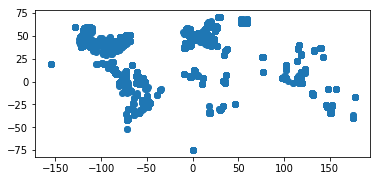

In [86]:
resource.plot()

In [6]:
df_bio = pd.read_table('../0003908-190415153152247.csv')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [11]:
df_bio.shape

(2211, 45)

In [9]:
df_bio.head().T

,0,1,2,3,4
gbifID,2236893127,2236868237,2236868219,2236867951,2236865908
datasetKey,50c9509d-22c7-4a22-a47d-8c48425ef4a7,50c9509d-22c7-4a22-a47d-8c48425ef4a7,50c9509d-22c7-4a22-a47d-8c48425ef4a7,50c9509d-22c7-4a22-a47d-8c48425ef4a7,50c9509d-22c7-4a22-a47d-8c48425ef4a7
occurrenceID,https://www.inaturalist.org/observations/22549992,https://www.inaturalist.org/observations/22454896,https://www.inaturalist.org/observations/22455209,https://www.inaturalist.org/observations/22456986,https://www.inaturalist.org/observations/22450242
kingdom,Animalia,Animalia,Animalia,Animalia,Animalia
phylum,Chordata,Chordata,Chordata,Chordata,Chordata
class,Mammalia,Mammalia,Mammalia,Mammalia,Mammalia
order,Primates,Artiodactyla,Rodentia,Rodentia,Artiodactyla
family,Cercopithecidae,Bovidae,Sciuridae,Muridae,Bovidae
genus,Colobus,Aepyceros,Xerus,Rhabdomys,Alcelaphus
species,Colobus angolensis,Aepyceros melampus,NaN,Rhabdomys pumilio,Alcelaphus buselaphus


In [15]:
(df_bio.isnull().sum() / df_bio.shape[0]).sort_values(ascending=False)

establishmentMeans               1.000000
typeStatus                       1.000000
coordinatePrecision              1.000000
recordNumber                     0.981456
depth                            0.927182
depthAccuracy                    0.927182
identifiedBy                     0.927182
elevationAccuracy                0.927182
elevation                        0.915875
locality                         0.832203
infraspecificEpithet             0.783808
mediaType                        0.187246
dateIdentified                   0.180461
rightsHolder                     0.149254
coordinateUncertaintyInMeters    0.129806
issue                            0.081863
occurrenceID                     0.064224
catalogNumber                    0.011307
speciesKey                       0.010855
species                          0.010855
family                           0.001357
genus                            0.001357
recordedBy                       0.000905
order                            0

In [17]:
kenya_gbif_0919 = pd.read_table('../biodiversity_data/KenyaBio0919.csv')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [18]:
kenya_gbif_0919.shape

(890595, 45)

In [22]:
kenya_gbif_0919.head(1).T

,0
gbifID,1901028990
datasetKey,50c9509d-22c7-4a22-a47d-8c48425ef4a7
occurrenceID,https://www.inaturalist.org/observations/14198122
kingdom,Animalia
phylum,Mollusca
class,Gastropoda
order,Stylommatophora
family,Achatinidae
genus,Achatina
species,Achatina albopicta


In [36]:
keep_columns=['gbifID',
              'datasetKey',
              'occurrenceID',
              'species',
              'countryCode',
              'publishingOrgKey',
              'decimalLatitude',
              'decimalLongitude',
              'year']

In [37]:
kenya_gbif_0919.drop(columns=kenya_gbif_0919.columns.difference(keep_columns),inplace=True)

In [38]:
(kenya_gbif_0919.isnull().sum() / kenya_gbif_0919.shape[0]).sort_values(ascending=False)

species             0.030562
occurrenceID        0.008683
decimalLongitude    0.003792
decimalLatitude     0.003792
year                0.000000
publishingOrgKey    0.000000
countryCode         0.000000
datasetKey          0.000000
gbifID              0.000000
dtype: float64

In [41]:
kenya_gbif_0919.dropna(inplace=True)

In [43]:
kenya_gbif_0919.dtypes

gbifID                int64
datasetKey           object
occurrenceID         object
species              object
countryCode          object
publishingOrgKey     object
decimalLatitude     float64
decimalLongitude    float64
year                  int64
dtype: object

In [45]:
len(kenya_gbif_0919['species'].value_counts())/

0.004544784207606398

In [46]:
kenya_gbif_0919.shape[0]

854386

In [ ]:
kenya_gbif_0919.mapPoint(tuple(('decimalLatitude','decimalLongitude')))

In [54]:
kenya_bio_map = gpd.GeoDataFrame(kenya_gbif_0919)

In [73]:
# for i in kenya_bio_map.index:
#     kenya_bio_map['geometry'][i] = tuple((kenya_bio_map['decimalLatitude'][i], kenya_bio_map['decimalLongitude'][i]))
#     print('working')
#     print(tuple((kenya_bio_map['decimalLatitude'][i], kenya_bio_map['decimalLongitude'][i])))

In [ ]:
kenya_bio_map['geometry'].map(Point)

In [ ]:
kenya_bio_map.to_file('../biodiversity_data/kenya_gbif_0919.shp')